In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("data/data_clasificacion.csv")

# Separar variables predictoras y variable objetivo
X = df.drop("Class", axis=1)
y = df["Class"]

min_samples_leaf_values = [1, 5, 10, 20]
ccp_alpha_values = [0.0, 0.001, 0.01, 0.1]

resultados = []

for m in min_samples_leaf_values:
    for alpha in ccp_alpha_values:
        clf = DecisionTreeClassifier(
            random_state=0,
            min_samples_leaf=m,
            ccp_alpha=alpha
        )
        clf.fit(X, y)
        y_pred = clf.predict(X)
        f1 = f1_score(y, y_pred, average="weighted")

        resultados.append({
            "min_samples_leaf": m,
            "ccp_alpha": alpha,
            "profundidad": clf.get_depth(),
            "n_hojas": clf.get_n_leaves(),
            "F1_score": f1
        })
        

# Pasar a DataFrame para verlo bien en tabla
resultados_df = pd.DataFrame(resultados)
display(resultados_df)

,min_samples_leaf,ccp_alpha,profundidad,n_hojas,F1_score
0,1,0.000,34,6638,0.906234
1,1,0.001,8,31,0.412252
2,1,0.010,3,5,0.223073
3,1,0.100,0,1,0.118632
4,5,0.000,26,2544,0.704154
5,5,0.001,8,31,0.412252
6,5,0.010,3,5,0.223073
7,5,0.100,0,1,0.118632
8,10,0.000,22,1337,0.615837
9,10,0.001,8,31,0.412252


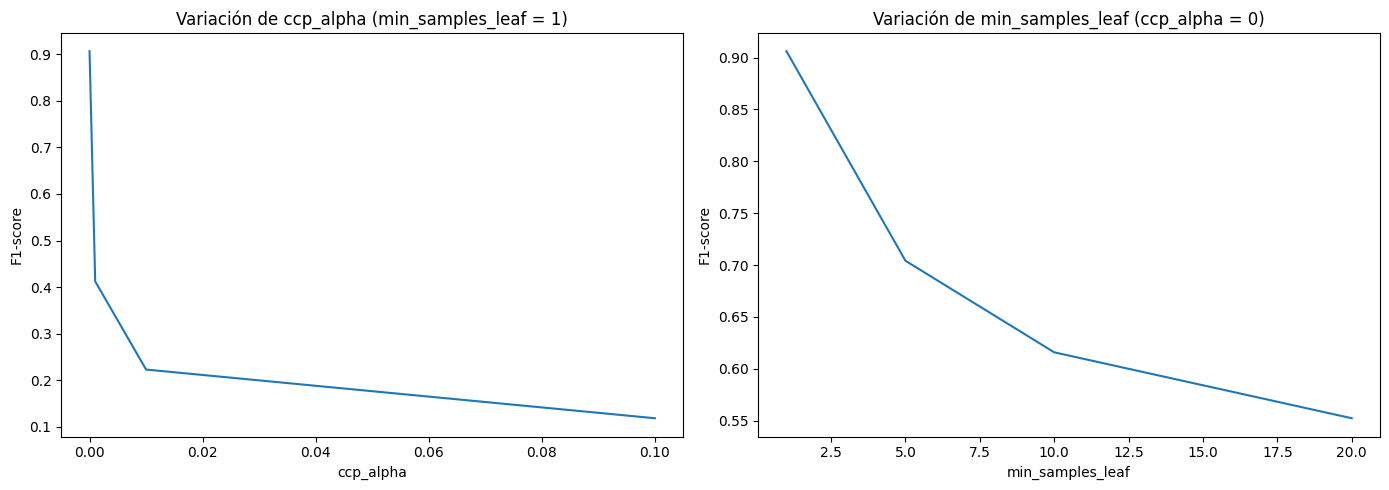

In [28]:
df_alpha = resultados_df[resultados_df["min_samples_leaf"] == 1]
df_msl = resultados_df[resultados_df["ccp_alpha"] == 0.0]

# Crear figura con dos subplots en una fila
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- Gráfico 1: variación de ccp_alpha ---
axes[0].plot(df_alpha["ccp_alpha"], df_alpha["F1_score"])
axes[0].set_title("Variación de ccp_alpha (min_samples_leaf = 1)")
axes[0].set_xlabel("ccp_alpha")
axes[0].set_ylabel("F1-score")

# --- Gráfico 2: variación de min_samples_leaf ---
axes[1].plot(df_msl["min_samples_leaf"], df_msl["F1_score"])
axes[1].set_title("Variación de min_samples_leaf (ccp_alpha = 0)")
axes[1].set_xlabel("min_samples_leaf")
axes[1].set_ylabel("F1-score")

plt.tight_layout()
plt.show()